Load required packages

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plt.style.use('seaborn-white')
%matplotlib inline

Some plotting functions to help you plot the ROC curve

In [84]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for house price > 200,000', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')


Load the Sacramento housing data

In [85]:
sac = pd.read_csv('Sacramentorealestatetransactions.csv')
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [86]:
type(sac.price)

pandas.core.series.Series

Create a binary variable where 1 indicates a house sold for over 200,000 and 0 indicates a house sold for equal to or less than 200,000.

Subset the data to just contain the number of beds, baths, the sq ft, and the over 200k indicator variable.

In [87]:
indicator = []
for x in sac.price:
    if x>200000:
        indicator.append(1)
    else:
        indicator.append(0)
indicator

sac['indicator'] = indicator
#sac = sac[['beds','baths','sq__ft','indicator']]
sac

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,indicator
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,0
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,0
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,0
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,0
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,0


In [88]:
sac['indicator'] = sac.price.map(lambda x: 1 if x>200000 else 0)
#sac = sac[['beds','baths','sq__ft','indicator']]
sac

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,indicator
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,0
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,0
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,0
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,0
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,0


In [90]:
import numpy
sac['indicator'] = numpy.where(sac.price > 200000,1,0)
sac = sac[['beds','baths','sq__ft','indicator']]
sac

,beds,baths,sq__ft,indicator
0,2,1,836,0
1,3,1,1167,0
2,2,1,796,0
3,2,1,852,0
4,2,1,797,0
5,3,1,1122,0
6,3,2,1104,0
7,3,1,1177,0
8,2,2,941,0
9,3,2,1146,0


Split your data into training and testing sets. The predictors are the beds, baths, and sq ft. The feature is the over 200k class variable. Make the test size 33% (and optionally stratify by the over 200k class).

In [92]:
from sklearn.cross_validation import train_test_split
X = sac[['beds','baths','sq__ft']]
Y = sac.indicator
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y, test_size = 0.33)

Fit a logistic regression on the training data.

In [93]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

Print out the confusion matrix

In [113]:
conmat = np.array(confusion_matrix(Y_test, Y_pred))

confusion = pd.DataFrame(conmat, index=['under_200k', 'over_200k'],
                         columns=['predicted_under_200k','predicted_over_200k'])

print(confusion)


            predicted_under_200k  predicted_over_200k
under_200k                    55                   90
over_200k                     43                  138


Calculate the accuracy, precision, and recall. What can these three metrics tell you about your model?

In [114]:
accuracy_score(Y_test,Y_pred)

0.59202453987730064

In [115]:
precision_score(Y_test,Y_pred)

0.60526315789473684

In [116]:
recall_score(Y_test,Y_pred)

0.76243093922651939

Say as a real estate agent, I prioritize minimizing false positives (predicting a house will sell for over 200k when it actually sells for under) because false positives make me lose money.

Change the decision threshold to **lower the false positive rate** and then print out the new confusion matrix. What is the downside to lowering the false positive rate?

In [134]:
lr.predict_proba(X_test) 
# prediction_prob. Second column is for >200. 228 houses are larger than 200(from prediction) in which only 138 achieved.

array([[ 0.44263493,  0.55736507],
       [ 0.73599072,  0.26400928],
       [ 0.45430788,  0.54569212],
       [ 0.35724365,  0.64275635],
       [ 0.37078825,  0.62921175],
       [ 0.16444246,  0.83555754],
       [ 0.54824243,  0.45175757],
       [ 0.62067928,  0.37932072],
       [ 0.43069997,  0.56930003],
       [ 0.39484184,  0.60515816],
       [ 0.73599072,  0.26400928],
       [ 0.73599072,  0.26400928],
       [ 0.15296004,  0.84703996],
       [ 0.4869803 ,  0.5130197 ],
       [ 0.38978717,  0.61021283],
       [ 0.73599072,  0.26400928],
       [ 0.43200013,  0.56799987],
       [ 0.395719  ,  0.604281  ],
       [ 0.73599072,  0.26400928],
       [ 0.58318481,  0.41681519],
       [ 0.73599072,  0.26400928],
       [ 0.73599072,  0.26400928],
       [ 0.13100686,  0.86899314],
       [ 0.73599072,  0.26400928],
       [ 0.34703531,  0.65296469],
       [ 0.40737826,  0.59262174],
       [ 0.3357369 ,  0.6642631 ],
       [ 0.62870899,  0.37129101],
       [ 0.73599072,

In [145]:
# To lower 90
def make_prediction(x, threshold=0.75):
    if x[1] >= threshold:
        return 1
    else:
        return 0

new_predictions = map(make_prediction,lr.predict_proba(X_test))

new_conmat = confusion_matrix(Y_test, new_predictions)

new_confusion = pd.DataFrame(new_conmat, index=['under_200k', 'over_200k'],
                         columns=['predicted_under_200k','predicted_over_200k'])

print(new_confusion)



            predicted_under_200k  predicted_over_200k
under_200k                   143                    2
over_200k                    150                   31


Plot the ROC curve using the plotting function provided.

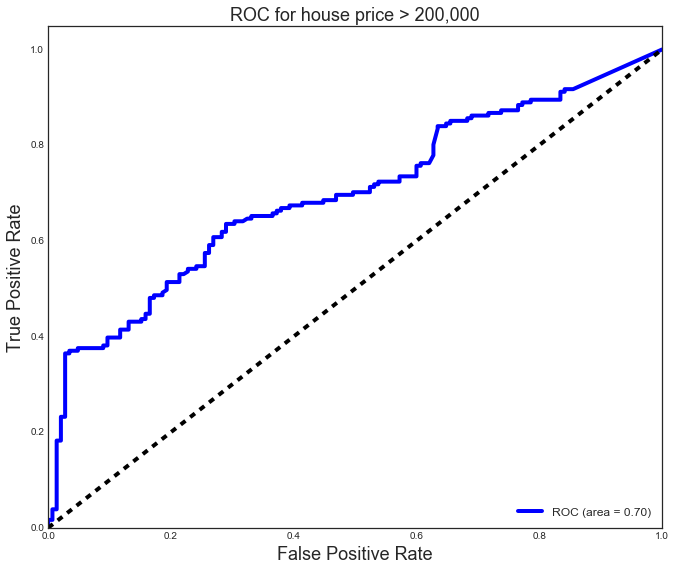

In [128]:
Y_score = lr.decision_function(X_test)
plot_roc(Y_test, Y_score)

Bonus: when might precision and recall be more useful than the ROC?

Precision and recall are more useful when the proportion of the positive class is smaller, since they are sensitive to this.